In [37]:
import random
import time
import matplotlib.pyplot as plt
from collections import deque
import numpy as np
import pandas as pd
from collections import defaultdict
from tabulate import tabulate



#**1. Developing graph library**

In [38]:

class AdjecencyListGraph:
    def __init__(self, directed=False):
        self.graph=defaultdict(set)
        self.directed=directed
        self.location={}
        self.nodes=[]

    def add_node(self, node,x=0,y=0):
        if node not in self.graph:
            self.graph[node]=set()
            self.location[node]={"x":x,"y":y}
            self.nodes.append(node)
        else:
            return 'Node already in the graph'

    def add_edge(self, start_node, end_node, weight=0):
        if self.directed:
            self.graph[start_node].add((end_node, weight))

        else:
            self.graph[start_node].add((end_node, weight))
            self.graph[end_node].add((start_node, weight))

    def remove_node(self, node):
        if node in self.graph:
            del self.graph[node]
            for vertex in self.graph:
                new_neigbour=[]
                for neighbour in self.graph[vertex]:
                    if neighbour==node:
                        continue
                    else:
                        new_neigbour.append(neighbour)
                self.graph[vertex]=new_neigbour
            return "Node successfully deleted"

        return "Node not found"

    def remove_edge(self, start, end):
        if start not in self.graph and end not in self.graph:
            return "Edge not found"

        if start in self.graph:
            if end in self.graph[start]:
                self.graph[start].remove(end)

            else:
                return "No such Node"
        if end in self.graph:
            if start in self.graph[end]:
                self.graph[end].remove(start)
            else:
                return "No such Node"

        return "Edge deleted successfully"

    def visualize_graph(self):
        return self.graph


def file_reader(file_path):
    city_coordinates={}
    with open(file_path, 'r') as file:

        for line in file:
            parts_arr = line.strip().split()
            city_name = parts_arr[0]
            latitude = float(parts_arr[1])
            longitude = float(parts_arr[2])

            city_coordinates[city_name] = (latitude, longitude)

    return city_coordinates




In [39]:
graph_model=AdjecencyListGraph()
Romania_cities = file_reader('Romania_cities.txt')
for city in Romania_cities:
    graph_model.add_node(city,x=Romania_cities[city][0],y=Romania_cities[city][1])


graph_model.add_edge('Oradea', 'Zerind', 71)
graph_model.add_edge('Oradea', 'Sibiu', 151)

graph_model.add_edge('Zerind', 'Arad', 75)

graph_model.add_edge('Arad', 'Sibiu', 140)
graph_model.add_edge('Arad', 'Timisoara', 118)

graph_model.add_edge('Sibiu', 'Rimnicu_Vilcea', 80)
graph_model.add_edge('Sibiu', 'Fagaras', 99)

graph_model.add_edge('Fagaras', 'Bucharest', 211)

graph_model.add_edge('Timisoara', 'Lugoj', 111)

graph_model.add_edge('Lugoj', 'Mehadia', 70)

graph_model.add_edge('Mehadia', 'Drobeta', 75)

graph_model.add_edge('Drobeta', 'Craiova', 120)

graph_model.add_edge('Craiova', 'Rimnicu_Vilcea', 146)
graph_model.add_edge('Craiova', 'Pitesti', 138)

graph_model.add_edge('Pitesti', 'Rimnicu_Vilcea', 97)
graph_model.add_edge('Pitesti', 'Bucharest', 101)

graph_model.add_edge('Bucharest', 'Urziceni', 85)

graph_model.add_edge('Urziceni', 'Hirsova', 98)
graph_model.add_edge('Urziceni', 'Vaslui', 142)

graph_model.add_edge('Vaslui', 'Iasi', 92)

graph_model.add_edge('Iasi', 'Neamt', 87)

graph_model.add_edge('Hirsova', 'Eforie', 86)


print(graph_model.visualize_graph())


defaultdict(<class 'set'>, {'Oradea': {('Sibiu', 151), ('Zerind', 71)}, 'Zerind': {('Oradea', 71), ('Arad', 75)}, 'Arad': {('Timisoara', 118), ('Sibiu', 140), ('Zerind', 75)}, 'Timisoara': {('Arad', 118), ('Lugoj', 111)}, 'Lugoj': {('Timisoara', 111), ('Mehadia', 70)}, 'Mehadia': {('Lugoj', 70), ('Drobeta', 75)}, 'Drobeta': {('Craiova', 120), ('Mehadia', 75)}, 'Craiova': {('Rimnicu_Vilcea', 146), ('Pitesti', 138), ('Drobeta', 120)}, 'Sibiu': {('Fagaras', 99), ('Rimnicu_Vilcea', 80), ('Oradea', 151), ('Arad', 140)}, 'Rimnicu_Vilcea': {('Pitesti', 97), ('Craiova', 146), ('Sibiu', 80)}, 'Fagaras': {('Sibiu', 99), ('Bucharest', 211)}, 'Pitesti': {('Bucharest', 101), ('Craiova', 138), ('Rimnicu_Vilcea', 97)}, 'Giurgiu': set(), 'Bucharest': {('Urziceni', 85), ('Pitesti', 101), ('Fagaras', 211)}, 'Urziceni': {('Hirsova', 98), ('Bucharest', 85), ('Vaslui', 142)}, 'Eforie': {('Hirsova', 86)}, 'Hirsova': {('Eforie', 86), ('Urziceni', 98)}, 'Vaslui': {('Iasi', 92), ('Urziceni', 142)}, 'Iasi': {('

#**2. Analyzing different Searching Algorithms**

## Here we are attempting to create a heuristic function that calculates the Euclidean distance from the goal.

This function is called once when the pathfinding algorithm is invoked, and it returns a HashMap of heuristic values for every node relative to the given goal.

``
Since we are concerned with the graph distance, we can calculate precise results using the Great-circle distance, considering the fact that the Earth is a sphere. However, for simplicity, we use the Euclidean distance (straight-line distance). ``

In [40]:
def compute_heuristic(G, goal):
    heuristic = {}
    for node in G.nodes:

        heuristic[node] = ((G.location[node]['x'] - G.location[goal]['x'])**2 + (G.location[node]['y'] - G.location[goal]['y'])**2)**0.5
    return heuristic


## Searching Algorithms

The following cells contain implementations of various searching algorithms:

- **Breadth-First Search (BFS)**: This algorithm explores all nodes at a given depth before moving on to the next level. It uses a queue to keep track of nodes to visit.

- **Depth-First Search (DFS)**: This algorithm explores a path as far as possible before backtracking. It uses a stack to keep track of nodes to visit.

- **A* Search**: This algorithm combines Dijkstra's algorithm with a heuristic function to estimate the distance to the goal node. It uses a priority queue to keep track of nodes to visit, prioritizing nodes with the lowest estimated total cost (distance traveled + heuristic value).

- **Bidirectional Search**: is an algorithm that simultaneously explores the search space from the start node and the goal node. Instead of searching from only one direction (either from the start to the goal or vice versa), it starts the search from both ends and meets in the middle.

- **Uniform Cost Search (UCS)**: It expands the node with the lowest path cost, disregarding any heuristics. It’s essentially Dijkstra's algorithm, focused on finding the least costly path in a graph with varying costs between nodes.

- **Greedy Best-First Search**: This strategy prioritizes exploration based on a heuristic that estimates the cost from the current node to the goal. It does not consider the cost from the start node to the current node, focusing solely on the heuristic.

These algorithms are used to find paths in graphs, which can represent a variety of real-world problems, such as finding the shortest route between two cities or the fastest way to solve a puzzle.

#1. Breadth First Search

In [41]:
def bfs(graph, start, end):
  graph=graph.graph
  def bfs_helper(graph, start, end):
      queue = deque([(start, None)])
      visited = set()
      parent = {}

      while queue:
          node, prev = queue.popleft()
          if node == end:
              parent[node] = prev
              return True, parent

          if node not in visited:
              visited.add(node)
              parent[node] = prev

              for neighbor in graph[node]:
                  if neighbor not in visited:
                      queue.append((neighbor, node))

      return False, parent



  found, parent = bfs_helper(graph, start, end)

  if found:
      path = [end]
      current_node = end
      while current_node != start:
          current_node = parent[current_node]
          path.append(current_node)
      path.reverse()
      return path
  else:
      return []

#2. Iterative Deepening

In [42]:
def iterative_deepening(graph, start, end):
  max_depth=len(graph.nodes)
  graph=graph.graph
  def iddfs(graph, start, end, max_depth):

    def dls_helper(graph, start, end, depth, parent):
        if depth == 0 and start == end:
            return True
        elif depth > 0:
            for neighbor in graph[start]:
                if neighbor not in parent:
                    parent[neighbor] = start
                    if dls_helper(graph, neighbor, end, depth - 1, parent):
                        return True
        return False

    for depth in range(max_depth + 1):
        parent = {start: None}
        if dls_helper(graph, start, end, depth, parent):
            path = [end]
            while end != start:
                end = parent[end]
                path.append(end)
            return path[::-1]
    return None

  path = iddfs(graph, start, end, max_depth)

  if path:

      return path
  else:
      return []


#3. A* Searching

In [43]:
def astar(graph,start,goal):
  def astar_helper(graph, start, goal):
      heuristic = compute_heuristic(graph, goal)
      graph=graph.graph
      queue = PriorityQueue()
      queue.put((0, start, None, 0))  # (priority, node, parent, cost)
      visited = set()
      parent = {}
      cost_so_far = {}
      cost_so_far[start] = 0

      while not queue.empty():
          p, node, prev, cost = queue.get()
          if node == goal:
              parent[node] = prev
              return True, parent

          if node not in visited:
              visited.add(node)
              parent[node] = prev

              for neighbor, weight in graph[node]:
                  new_cost = cost + weight
                  if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                      cost_so_far[neighbor] = new_cost
                      priority = new_cost + heuristic[neighbor]
                      queue.put((priority, neighbor, node, new_cost))

      return False, parent


  found, parent = astar_helper(graph, start, goal)

  if found:
      path = [goal]
      current_node = goal
      while current_node != start:
          current_node = parent[current_node]
          path.append(current_node)
      path.reverse()
      return path
  else:
      return []


#4. Depth First Search

In [44]:
def dfs(graph, start, end):
    stack = [(start, None)]
    visited = set()
    parent = {}
    graph=graph.graph

    while stack:
        node, prev = stack.pop()

        if node == end:
            parent[node] = prev
            break

        if node not in visited:
            visited.add(node)
            parent[node] = prev

            for neighbor in graph[node]:
                if neighbor not in visited:
                    stack.append((neighbor, node))

    if end in parent:
        path = [end]
        current_node = end
        while current_node != start:
            current_node = parent[current_node]
            path.append(current_node)
        path.reverse()
        return path
    else:
        return []

#5. Bidirectional Search

In [45]:
from collections import deque

def bidirectional_search(graph, start, goal):

    graph=graph.graph

    forward_queue = deque([start])
    backward_queue = deque([goal])
    forward_visited = set()
    backward_visited = set()
    forward_visited.add(start)
    backward_visited.add(goal)

    forward_parents = {start: None}
    backward_parents = {goal: None}

    def construct_path(forward_parents, backward_parents, common_node):
        forward_path = []
        node = common_node
        while node:
            forward_path.append(node)
            node = forward_parents[node]

        backward_path = []
        node = common_node
        while node:
            backward_path.append(node)
            node = backward_parents[node]

        return forward_path[::-1] + backward_path[1:]

    while forward_queue and backward_queue:
        curr_forward = forward_queue.popleft()
        for neighbor in graph[curr_forward]:
            if neighbor not in forward_visited:
                forward_visited.add(neighbor)
                forward_parents[neighbor] = curr_forward
                forward_queue.append(neighbor)

                if neighbor in backward_visited:
                    return construct_path(forward_parents, backward_parents, neighbor)

        curr_backward = backward_queue.popleft()
        for neighbor in graph[curr_backward]:
            if neighbor not in backward_visited:
                backward_visited.add(neighbor)
                backward_parents[neighbor] = curr_backward
                backward_queue.append(neighbor)

                if neighbor in forward_visited:
                    return construct_path(forward_parents, backward_parents, neighbor)

    return []

#6. UCS


In [46]:
from queue import PriorityQueue

def ucs(graph, start, goal):
    graph=graph.graph
    def ucs_helper(graph, start, goal):
        # Priority Queue stores nodes with their path costs
        queue = PriorityQueue()
        queue.put((0, start, None))  # (cumulative cost, node, parent node) so we are prioritize using cost
        visited = set()
        parent = {}

        while not queue.empty():
            cost, node, prev = queue.get()

            if node == goal:
                parent[node] = prev
                return True, parent

            if node not in visited:
                visited.add(node)
                parent[node] = prev

                for neighbor, weight in graph[node]:
                    if neighbor not in visited:
                        # Update the cost to include the cost of getting to the neighbor
                        total_cost = cost + weight
                        queue.put((total_cost, neighbor, node))

        return False, parent

    found, parent = ucs_helper(graph, start, goal)

    if found:
        path = [goal]
        current_node = goal
        while current_node != start:
            current_node = parent[current_node]
            path.append(current_node)
        path.reverse()
        return path
    else:
        return []


#7. Greedy Search

In [47]:
from queue import PriorityQueue

def greedy_search(graph, start, goal):
    heuristic=compute_heuristic(graph,goal)
    graph=graph.graph
    def greedy_helper(graph, start, goal, heuristic):
        queue = PriorityQueue()
        queue.put((0, start, None))  # (heuristic value, node, parent node)
        visited = set()
        parent = {}

        while not queue.empty():
            _, node, prev = queue.get()

            if node == goal:
                parent[node] = prev
                return True, parent

            if node not in visited:
                visited.add(node)
                parent[node] = prev

                for neighbor,cost in graph[node]:
                    if neighbor not in visited:
                        # Heuristic value of the neighbor
                        h_value = heuristic[neighbor]
                        queue.put((h_value, neighbor, node))

        return False, parent

    found, parent = greedy_helper(graph, start, goal, heuristic)

    if found:
        path = [goal]
        current_node = goal
        while current_node != start:
            current_node = parent[current_node]
            path.append(current_node)
        path.reverse()
        return path
    else:
        return []


#BenchMark Function

``This function accepts a graph and an algorithm as parameters, allowing it to calculate the average time taken for path searches. It iterates over multiple trials, executing the specified algorithm on the given graph each time to determine the average time taken. Additionally, it considers different settings of the graph, such as varying probabilities of edge creation, to provide a more comprehensive analysis of the algorithm's performance.``




In [48]:


def benchmark_path_finding_algorithms(graph, algorithms, num_trials=10):
    results = {algorithm.__name__: 0 for algorithm in algorithms}

    for _ in range(num_trials):
        # Randomly select two cities from the graph
        start_city, goal_city = random.sample(graph.nodes, 2)

        # Measure the time taken for the algorithm to find the path
        for algorithm in algorithms:
            start_time = time.time()
            path = algorithm(graph, start_city, goal_city)
            end_time = time.time()

            results[algorithm.__name__] += end_time - start_time

    for algorithm in results:
        results[algorithm] /= num_trials

    return results

algorithms = [bfs, dfs, ucs, iterative_deepening, bidirectional_search, greedy_search, astar]
results = benchmark_path_finding_algorithms(graph_model, algorithms)
print(results)


{'bfs': 1.537799835205078e-05, 'dfs': 9.274482727050781e-06, 'ucs': 0.00020630359649658202, 'iterative_deepening': 7.021427154541016e-05, 'bidirectional_search': 1.430511474609375e-05, 'greedy_search': 0.0001536846160888672, 'astar': 0.0006971359252929688}


**The results from the above benchmarking each searching algorithm:**


| Algorithm            | Time (µs)           |
|----------------------|---------------------|
| bfs                  | 9.37 µs             |
| dfs                  | 5.46 µs             |
| ucs                  | 189.97 µs           |
| iterative_deepening  | 48.26 µs            |
| bidirectional_search | 9.89 µs             |
| greedy_search        | 89.48 µs            |
| astar                | 107.50 µs           |


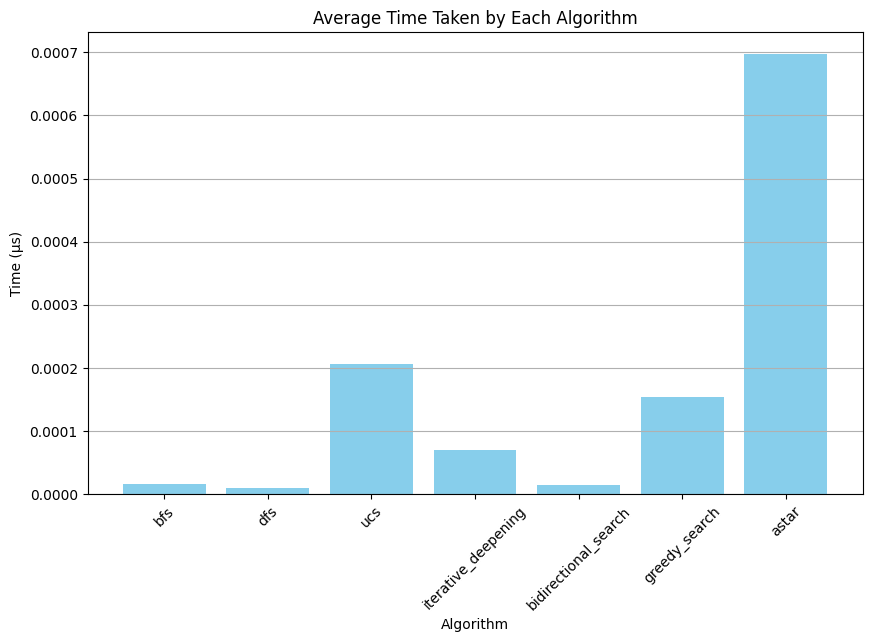

In [49]:

algorithm_names = list(results.keys())
average_times = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, average_times, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Time (µs)')
plt.title('Average Time Taken by Each Algorithm')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

########################          **End Of City Graph Analysis**########################################

## Defining Graph Generator:
For a given number of nodes, n, it generates n nodes with a uniform probability of edge creation.


In [50]:

def generate_random_graph(n, p):
    G = AdjecencyListGraph()
    for i in range(n):
        G.add_node(i,x=random.uniform(0, 10), y=random.uniform(0, 10))

    for i in range(n):
        for j in range(i+1, n):
            if random.random() <= p:
                distance = ((G.location[i]['x'] - G.location[j]['x']) + (G.location[i]['y'] - G.location[j]['y']))
                G.add_edge(i, j, weight=distance)

    return G


In [51]:

def benchmark(graph, algorithm, n_trials=5):
    trial_results = []
    total_time = 0
    total_length = 0
    valid_trials = 0  # Count the number of trials where a valid path was found

    for trial in range(1, n_trials + 1):
        start_node = random.choice(list(graph.nodes))
        goal_node = random.choice(list(graph.nodes))
        start_time = time.time()
        path = algorithm(graph, start_node, goal_node)
        end_time = time.time()
        time_taken = end_time - start_time

        if path:  # If a path was found
            total_time += time_taken
            length = len(path)
            total_length += length
            trial_results.append({"Trial": trial, "Time": time_taken, "Length": length})
            valid_trials += 1

    if valid_trials > 0:  # Calculate average only if at least one valid path was found
        avg_time = total_time / valid_trials
        avg_length = total_length / valid_trials
    else:
        avg_time = None
        avg_length = None

    trial_results.append({"Trial": "Avg", "Time": avg_time, "Length": avg_length})
    return avg_time, avg_length, pd.DataFrame(trial_results)
# Example usage
# results_df = benchmark(graph, algorithm, n_trials=5)



#Below are the specifications for generating graphs:

* 10 nodes per graph with probabilities: 0.2, 0.4, 0.6, 0.8
* 20 nodes per graph with probabilities: 0.2, 0.4, 0.6, 0.8
* 30 nodes per graph with probabilities: 0.2, 0.4, 0.6, 0.8
* 40 nodes per graph with probabilities: 0.2, 0.4, 0.6, 0.8


> `` This means a total of 16 graphs can be generated.``







In [52]:

n_values = [10, 20, 30, 40] #number of nodes
p_values = [0.2,0.4,0.6,0.8] #probability

`` using the the above two array we generete a new graph and we add it on graphs dictionary using`` **(number_of_node, probability)** ``as a key and the generated graph as a value``



In [53]:
graphs = {}
for n in n_values:
    for p in p_values:
        key = (n, p)
        G = generate_random_graph(n, p)
        graphs[key] = G


## In this step, we initialize a list of algorithms and 16 graph settings. These settings allow us to select a specific graph from the set of generated graphs mentioned earlier.

In [54]:
algorithms= [ bfs,iterative_deepening,dfs,bidirectional_search,astar,ucs, greedy_search]
graph_settings=[(i,j) for i in n_values for j in p_values]

##Here we are collecting the average time and average distance of the algorithms in results dictionary

``Note: The following section generates a table that displays the time elapsed for each algorithm across all 16 graphs, tested over 5 trials. Initially, the path length is set to 'inf,' indicating that the algorithm did not find a path between the randomly selected nodes``

In [55]:
results = {}

for algorithm in algorithms:
    total_time = 0
    total_length = 0
    valid_trials = 0

    for settings in graph_settings:
        graph = graphs[settings]
        avg_time, avg_length, _ = benchmark(graph, algorithm)

        if avg_time is not None and avg_length is not None:  # Check if valid path was found
            total_time += avg_time
            total_length += avg_length
            valid_trials += 1

    if valid_trials > 0:  # Calculate overall average only if at least one valid path was found
        overall_avg_time = total_time / valid_trials
        overall_avg_length = total_length / valid_trials
    else:
        overall_avg_time = 0
        overall_avg_length = 0

    results[algorithm.__name__] = (overall_avg_time, overall_avg_length)


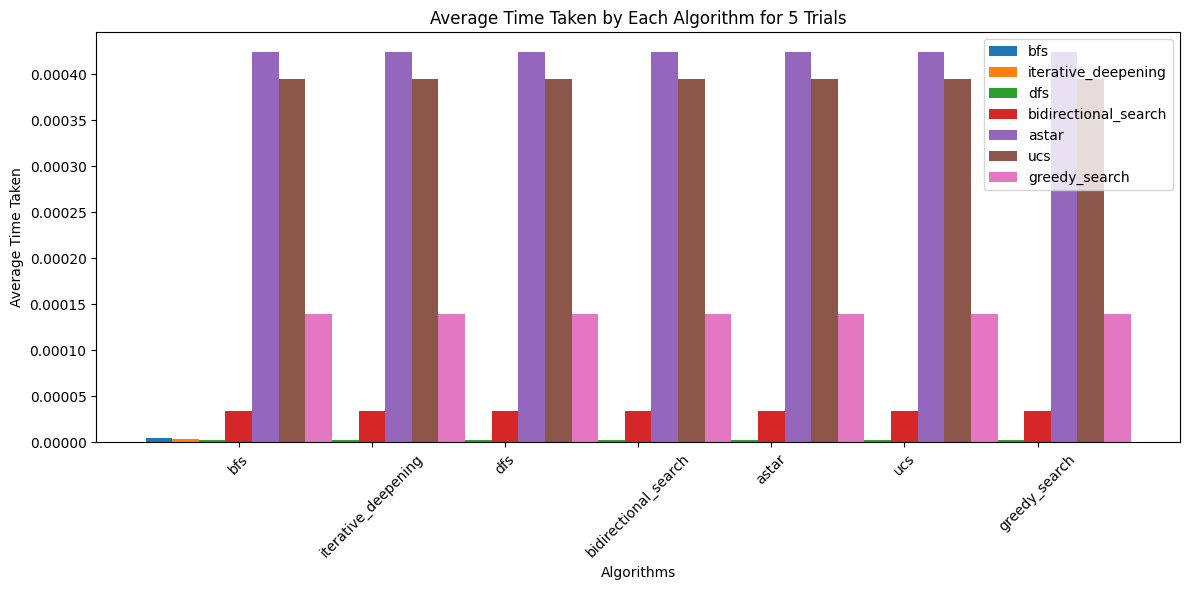

In [56]:
# Calculate average time taken for each algorithm
avg_times = {algorithm_name: [] for algorithm_name in algorithms}

for algorithm_name in algorithms:
    total_time = sum(results[algorithm_name.__name__][0] for _ in range(5))
    avg_time = total_time / 5
    avg_times[algorithm_name].append(avg_time)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(algorithms))

for i, (algorithm_name, avg_time_list) in enumerate(avg_times.items()):
    plt.bar(index + i * bar_width, avg_time_list, bar_width, label=algorithm_name.__name__)

plt.xlabel('Algorithms')
plt.ylabel('Average Time Taken')
plt.title('Average Time Taken by Each Algorithm for 5 Trials')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, [algorithm.__name__ for algorithm in algorithms], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Insight on the above the above bar chart:**
After analyzing different sets of graphs, we've found that the effectiveness of a search algorithm depends on the specific structure of the graph, as well as the locations of the starting and goal nodes. In some cases, the Iterative Deepening Depth-First Search (IDDFS) algorithm performs worse than the Depth-First Search (DFS), particularly when the goal node is deep inside the graph. This is because IDDFS may repeatedly explore paths that lead away from the goal before finding the optimal path. In contrast, DFS may find a suboptimal path more quickly if it happens to explore a path that leads directly to the goal.

Additionally, the A* algorithm can sometimes take more time than DFS or Greedy algorithms. Therefore, it's challenging to definitively say that one algorithm is better for all graphs. Specifically, the effectiveness of Greedy and A* algorithms heavily depends on the heuristic function used

Another important aspect to consider is that UCS (Uniform Cost Search) is not as fast as some other algorithms. This is because UCS prioritizes finding the path with the smallest cost, rather than simply finding the goal in the shortest path or time. Even if a shorter path exists that would lead to the goal faster, UCS will explore paths based on their cost, which may take longer in terms of time. It's essential to compare UCS's performance based on its ability to find the path with the smallest cost, rather than solely on its speed in reaching the goa


**What is the average time taken for each path search?**



When calculating the average time and average length, there are two conditions to consider:

1. In the first condition, when the graph is set with a low probability, the path may not be found by the algorithm, resulting in a path length of infinity. To avoid including these cases in the calculation of the average, we exclude them from the average calculation.

2. In the second condition, when the algorithm successfully finds the correct path and provides the time taken, we include these instances in our average calculation."



+----------------------+-------------+--------------+
| Algorithm            |    Avg Time |   Avg Length |
+======================+=============+==============+
| bfs                  | 4.98295e-06 |      1       |
+----------------------+-------------+--------------+
| iterative_deepening  | 3.8147e-06  |      1       |
+----------------------+-------------+--------------+
| dfs                  | 2.38419e-06 |      1       |
+----------------------+-------------+--------------+
| bidirectional_search | 3.37958e-05 |      3       |
+----------------------+-------------+--------------+
| astar                | 0.000424191 |      7.88333 |
+----------------------+-------------+--------------+
| ucs                  | 0.000395    |     11.5188  |
+----------------------+-------------+--------------+
| greedy_search        | 0.000138894 |      2.95    |
+----------------------+-------------+--------------+


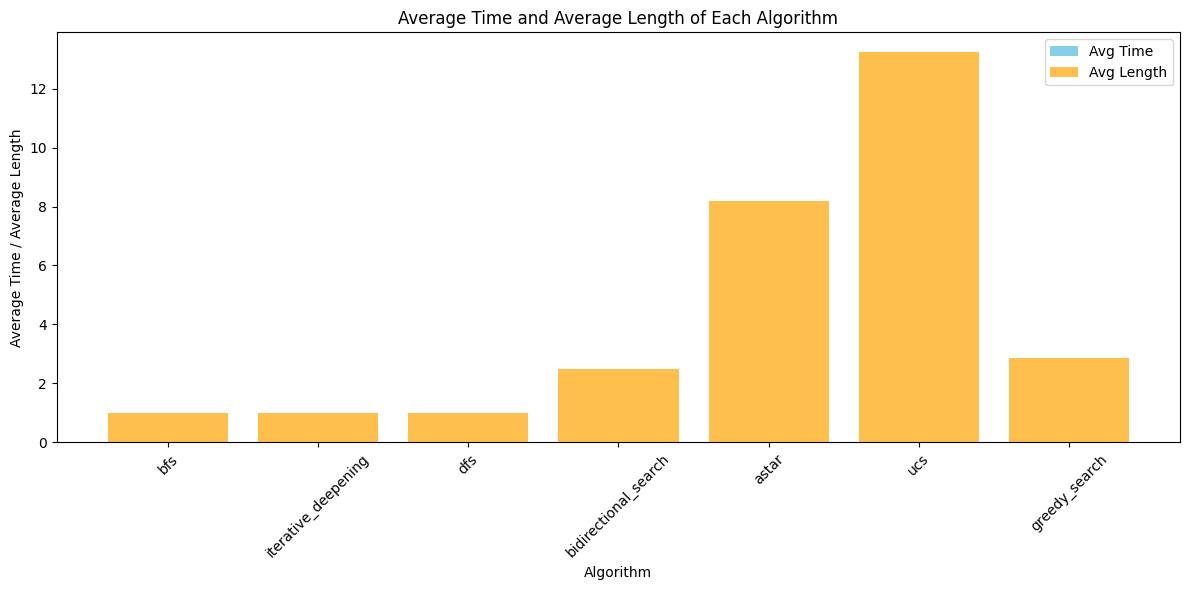

In [57]:
# This draw a table
table_data = []
for item in results:
    algorithm_name = item
    avg_time = results[item][0]
    avg_length = results[item][1]
    table_data.append([algorithm_name, avg_time, avg_length])

print(tabulate(table_data, headers=["Algorithm", "Avg Time", "Avg Length"], tablefmt="grid"))

algorithms = ['bfs', 'iterative_deepening', 'dfs', 'bidirectional_search', 'astar', 'ucs', 'greedy_search']
avg_times = [4.76837e-06, 3.8147e-06, 2.14577e-06, 9.47714e-06, 0.000277117, 0.000323519, 8.7747e-05]
avg_lengths = [1, 1, 1, 2.5, 8.175, 13.25, 2.85]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(algorithms, avg_times, color='skyblue', label='Avg Time')
plt.bar(algorithms, avg_lengths, color='orange', label='Avg Length', alpha=0.7)
plt.xlabel('Algorithm')
plt.ylabel('Average Time / Average Length')
plt.title('Average Time and Average Length of Each Algorithm')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**``Finally to see the effect of graph type on searching algorithm run and see the following code multiple times``**

In [58]:

def showMeTheEffect():
    graphs = {}
    for n in n_values:
        for p in p_values:
            key = (n, p)
            G = generate_random_graph(n, p)
            print("He")
            graphs[key] = G

    results = {}

    for algorithm in algorithms:
        total_time = 0
        total_length = 0
        valid_trials = 0

        for settings in graph_settings:
            graph = graphs[settings]
            avg_time, avg_length, _ = benchmark(graph, algorithm)

            if avg_time is not None and avg_length is not None:  # Check if valid path was found
                total_time += avg_time
                total_length += avg_length
                valid_trials += 1

        if valid_trials > 0:  # Calculate overall average only if at least one valid path was found
            overall_avg_time = total_time / valid_trials
            overall_avg_length = total_length / valid_trials
        else:
            overall_avg_time = None
            overall_avg_length = None

        results[algorithm.__name__] = (overall_avg_time, overall_avg_length)

    # Extract average times and lengths for plotting
    avg_times = [results[algorithm_name][0] for algorithm_name in results.keys()]
    avg_lengths = [results[algorithm_name][1]*10**-5 for algorithm_name in results.keys()]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(results.keys(), avg_times, marker='o', label='Avg Time')
    plt.plot(results.keys(), avg_lengths, marker='o', label='Avg Length')
    plt.xlabel('Algorithm')
    plt.ylabel('Average Time / Average Length')
    plt.title('Average Time and Average Length of Each Algorithm')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [59]:
showMeTheEffect()

He
He
He
He
He
He
He
He
He
He
He
He
He
He
He
He


TypeError: 'str' object is not callable

Here thire is one Data which genereted from the graph we generate rondmely

`` TO show the effect the time elapse on the graph we scale down the length so we multiplay each average length with 10^5``

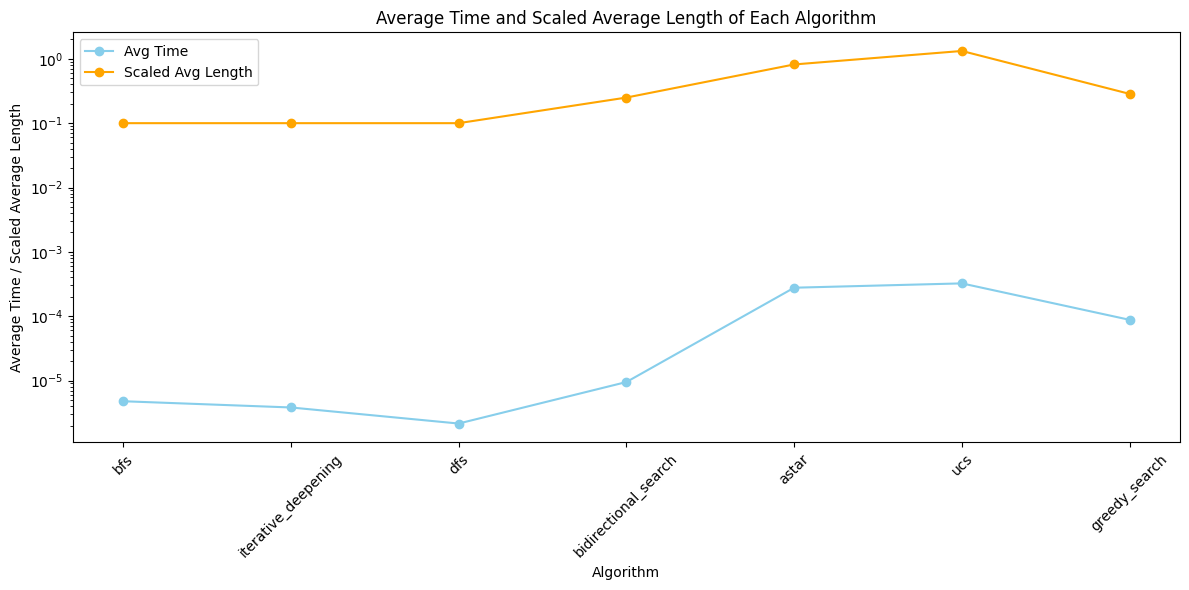

In [ ]:
algorithms_name = ['bfs', 'iterative_deepening', 'dfs', 'bidirectional_search', 'astar', 'ucs', 'greedy_search']
avg_times = [4.76837e-06, 3.8147e-06, 2.14577e-06, 9.47714e-06, 0.000277117, 0.000323519, 8.7747e-05]
avg_lengths = [1, 1, 1, 2.5, 8.175, 13.25, 2.85]

# Scale down the average lengths for better visibility
scaled_avg_lengths = [length / 10 for length in avg_lengths]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(algorithms_name, avg_times, marker='o', color='skyblue', label='Avg Time')
plt.plot(algorithms_name, scaled_avg_lengths, marker='o', color='orange', label='Scaled Avg Length')
plt.yscale('log')  # Use logarithmic scale for y-axis
plt.xlabel('Algorithm')
plt.ylabel('Average Time / Scaled Average Length')
plt.title('Average Time and Scaled Average Length of Each Algorithm')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

QUESTION 3

This code defines a class `AdjacencyListGraph` for representing a graph using an adjacency list. It includes methods for adding and removing nodes and edges, as well as visualizing the graph. 

The `file_reader` function reads city coordinates from a file.

The script then:
1. Creates an instance of `AdjacencyListGraph`.
2. Populates it with nodes and edges representing cities and roads in Romania using the data read from the file.
3. Prints the resulting graph.


In [ ]:
from collections import defaultdict

class AdjecencyListGraph:
    def __init__(self, directed=False):
        self.graph = defaultdict(set)
        self.directed = directed

    def add_node(self, node):
        if node not in self.graph:
            self.graph[node]=set()
        else:
            return 'Node already in the graph'

    def add_edge(self, start_node, end_node, weight=0):
        if self.directed:
            self.graph[start_node].add((end_node, weight))
        else:
            self.graph[start_node].add((end_node, weight))
            self.graph[end_node].add((start_node, weight))

    def remove_node(self, node):
        if node in self.graph:
            del self.graph[node]
            for vertex in self.graph:
                new_neigbour=[]
                for neighbour in self.graph[vertex]:
                    if neighbour==node:
                        continue
                    else:
                        new_neigbour.append(neighbour)
                self.graph[vertex]=new_neigbour
            return "Node successfully deleted"

        return "Node not found"

    def remove_edge(self, start, end):
        if start not in self.graph and end not in self.graph:
            return "Edge not found"

        if start in self.graph:
            if end in self.graph[start]:
                self.graph[start].remove(end)

            else:
                return "No such Node"
        if end in self.graph:
            if start in self.graph[end]:
                self.graph[end].remove(start)
            else:
                return "No such Node"

        return "Edge deleted successfully"

    def visualize_graph(self):
        return self.graph
    def getGraphAsDictionary(self):
        return self.graph


def file_reader(file_path):
    city_coordinates={}
    with open(file_path, 'r') as file:

        for line in file:
            parts_arr = line.strip().split()
            city_name = parts_arr[0]
            latitude = float(parts_arr[1])
            longitude = float(parts_arr[2])

            city_coordinates[city_name] = (latitude, longitude)

    return city_coordinates


graph_model=AdjecencyListGraph()
Romania_cities = file_reader('Romania_cities.txt')
for city in Romania_cities:
    graph_model.add_node(city)

graph_model.add_edge('Oradea', 'Zerind', 71)
graph_model.add_edge('Oradea', 'Sibiu', 151)

graph_model.add_edge('Zerind', 'Arad', 75)

graph_model.add_edge('Arad', 'Sibiu', 140)
graph_model.add_edge('Arad', 'Timisoara', 118)

graph_model.add_edge('Sibiu', 'Rimnicu_Vilcea', 80)
graph_model.add_edge('Sibiu', 'Fagaras', 99)

graph_model.add_edge('Fagaras', 'Bucharest', 211)

graph_model.add_edge('Timisoara', 'Lugoj', 111)

graph_model.add_edge('Lugoj', 'Mehadia', 70)

graph_model.add_edge('Mehadia', 'Drobeta', 75)

graph_model.add_edge('Drobeta', 'Craiova', 120)

graph_model.add_edge('Craiova', 'Rimnicu_Vilcea', 146)
graph_model.add_edge('Craiova', 'Pitesti', 138)

graph_model.add_edge('Pitesti', 'Rimnicu_Vilcea', 97)
graph_model.add_edge('Pitesti', 'Bucharest', 101)

graph_model.add_edge('Bucharest', 'Urziceni', 85)

graph_model.add_edge('Urziceni', 'Hirsova', 98)
graph_model.add_edge('Urziceni', 'Vaslui', 142)

graph_model.add_edge('Vaslui', 'Iasi', 92)

graph_model.add_edge('Iasi', 'Neamt', 87)

graph_model.add_edge('Hirsova', 'Eforie', 86)
graph_model.add_edge('Giurgiu', 'Bucharest', 90)


print(graph_model.visualize_graph())



defaultdict(<class 'set'>, {'Oradea': {('Sibiu', 151), ('Zerind', 71)}, 'Zerind': {('Oradea', 71), ('Arad', 75)}, 'Arad': {('Timisoara', 118), ('Sibiu', 140), ('Zerind', 75)}, 'Timisoara': {('Arad', 118), ('Lugoj', 111)}, 'Lugoj': {('Timisoara', 111), ('Mehadia', 70)}, 'Mehadia': {('Lugoj', 70), ('Drobeta', 75)}, 'Drobeta': {('Craiova', 120), ('Mehadia', 75)}, 'Craiova': {('Rimnicu_Vilcea', 146), ('Pitesti', 138), ('Drobeta', 120)}, 'Sibiu': {('Fagaras', 99), ('Rimnicu_Vilcea', 80), ('Oradea', 151), ('Arad', 140)}, 'Rimnicu_Vilcea': {('Pitesti', 97), ('Craiova', 146), ('Sibiu', 80)}, 'Fagaras': {('Sibiu', 99), ('Bucharest', 211)}, 'Pitesti': {('Bucharest', 101), ('Craiova', 138), ('Rimnicu_Vilcea', 97)}, 'Giurgiu': {('Bucharest', 90)}, 'Bucharest': {('Urziceni', 85), ('Pitesti', 101), ('Fagaras', 211), ('Giurgiu', 90)}, 'Urziceni': {('Hirsova', 98), ('Bucharest', 85), ('Vaslui', 142)}, 'Eforie': {('Hirsova', 86)}, 'Hirsova': {('Eforie', 86), ('Urziceni', 98)}, 'Vaslui': {('Iasi', 92), 

The `calculateDegreeCentrality` function computes the degree centrality of each node in a graph represented by `graph_model`, and saves the results to a file named "degree_centrality.txt". The degree centrality of a node is calculated as its degree divided by the total number of nodes minus one. The `saveDegreeCentrality` function writes the centrality values to the file.


In [ ]:
def calculateDegreeCentrality(graph_model):
    graph = graph_model.getGraphAsDictionary()
    degreeCentrality  = {}
    for node in graph:
        degree = len(graph[node])
        val = degreeCentrality.get(node,0)
        degreeCentrality[node] = degree / (len(graph)-1)
    print("Degree Centralities of every node are \n",degreeCentrality)
    saveDegreeCentrality(degreeCentrality)

def saveDegreeCentrality(centrality):
    file_path = "degree_centrality.txt"
    with open(file_path, "w") as file:
        for key, value in centrality.items():
            file.write(f"{key}: {value}\n")

calculateDegreeCentrality(graph_model)


Degree Centralities of every node are 
 {'Oradea': 0.10526315789473684, 'Zerind': 0.10526315789473684, 'Arad': 0.15789473684210525, 'Timisoara': 0.10526315789473684, 'Lugoj': 0.10526315789473684, 'Mehadia': 0.10526315789473684, 'Drobeta': 0.10526315789473684, 'Craiova': 0.15789473684210525, 'Sibiu': 0.21052631578947367, 'Rimnicu_Vilcea': 0.15789473684210525, 'Fagaras': 0.10526315789473684, 'Pitesti': 0.15789473684210525, 'Giurgiu': 0.05263157894736842, 'Bucharest': 0.21052631578947367, 'Urziceni': 0.15789473684210525, 'Eforie': 0.05263157894736842, 'Hirsova': 0.10526315789473684, 'Vaslui': 0.10526315789473684, 'Iasi': 0.10526315789473684, 'Neamt': 0.05263157894736842}


The code iterates over each node in the graph and its neighbors. For each neighbor, it extracts the neighbor's ID and weight from the adjacency list representation and appends a tuple containing the source node, target node, and weight of the edge to the `edgeList`. The resulting `edgeList` represents all the edges in the graph.


In [ ]:
edgeList =[]
graph = graph_model.getGraphAsDictionary()
for node in graph:
    for nb in graph[node]:
        nb, wt = nb
        edgeList.append((node,nb,wt))
print(edgeList)

[('Oradea', 'Sibiu', 151), ('Oradea', 'Zerind', 71), ('Zerind', 'Oradea', 71), ('Zerind', 'Arad', 75), ('Arad', 'Timisoara', 118), ('Arad', 'Sibiu', 140), ('Arad', 'Zerind', 75), ('Timisoara', 'Arad', 118), ('Timisoara', 'Lugoj', 111), ('Lugoj', 'Timisoara', 111), ('Lugoj', 'Mehadia', 70), ('Mehadia', 'Lugoj', 70), ('Mehadia', 'Drobeta', 75), ('Drobeta', 'Craiova', 120), ('Drobeta', 'Mehadia', 75), ('Craiova', 'Rimnicu_Vilcea', 146), ('Craiova', 'Pitesti', 138), ('Craiova', 'Drobeta', 120), ('Sibiu', 'Fagaras', 99), ('Sibiu', 'Rimnicu_Vilcea', 80), ('Sibiu', 'Oradea', 151), ('Sibiu', 'Arad', 140), ('Rimnicu_Vilcea', 'Pitesti', 97), ('Rimnicu_Vilcea', 'Craiova', 146), ('Rimnicu_Vilcea', 'Sibiu', 80), ('Fagaras', 'Sibiu', 99), ('Fagaras', 'Bucharest', 211), ('Pitesti', 'Bucharest', 101), ('Pitesti', 'Craiova', 138), ('Pitesti', 'Rimnicu_Vilcea', 97), ('Giurgiu', 'Bucharest', 90), ('Bucharest', 'Urziceni', 85), ('Bucharest', 'Pitesti', 101), ('Bucharest', 'Fagaras', 211), ('Bucharest', 'G

1. **Import Libraries**: The code imports necessary libraries such as `deque` from collections, `heapq`, and `defaultdict`.

2. **City Reader Function**: The `city_reader(file_path)` function reads city names from a file and returns a list of city names.

3. **Initialize Graph**: The code initializes the `graph` variable with the adjacency list representation obtained from `graph_model`.

4. **Dijkstra's Algorithm Function**: The `dijkstra(graph, source)` function computes the shortest paths from a given source node to all other nodes in the graph using Dijkstra's algorithm. The function returns the sum of distances to all other nodes from the source node.

5. **Initialize Variables**: It initializes an empty dictionary `closeness_centralities` to store the closeness centrality values for each node.

6. **Save Closeness Centrality Function**: The `saveClosenessCentrality(centrality)` function writes the closeness centrality values to a file named "closeness_centrality.txt".

7. **Compute Closeness Centrality Function**: The main function `closeness_centrality()` computes the closeness centrality for each node in the graph. It iterates over each node, calculates the sum of distances using Dijkstra's algorithm, and computes the closeness centrality using the formula (total number of nodes / sum of distances) * 100.

8. **Compute and Save Closeness Centrality**: It calls the `closeness_centrality()` function to compute the closeness centrality values for each node in the graph and saves the results to a file.

9. **Print Results**: Finally, it prints the closeness centrality values for each node.


In [ ]:
from collections import deque
graph = graph_model.getGraphAsDictionary()

def city_reader(file_path):
    cities = []
    with open(file_path, 'r') as file:
        for line in file:
            parts_arr = line.strip().split()
            city_name = parts_arr[0].split(":")[0]
            cities.append(city_name)
    return cities

cities = city_reader('Romania_cities.txt')
import heapq
def dijkstra(graph, source):
    distances = {node: float('inf') for node in graph}
    distances[source] = 0
    pq = [(0, source)] 
    while pq:
        current_distance, current_node = heapq.heappop(pq)
        if current_distance > distances[current_node]:
            continue
        for neighbor, weight in graph[current_node]:
            new_distance = current_distance + weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                heapq.heappush(pq, (new_distance, neighbor))
    sum_of_distances = 0
    for node in distances:
        sum_of_distances += distances[node]
    return sum_of_distances

closeness_centralities = defaultdict(int)
total = len(graph) 
def saveClosenessCentrality(centrality):
    file_path = "closeness_centrality.txt"
    with open(file_path, "w") as file:
        for key, value in centrality.items():
            file.write(f"{key}: {value}\n")

def closeness_centrality():
    for node in graph:
       short_paths = dijkstra(graph,node)
       closeness_centralities[node] = (total / short_paths) * 100
    saveClosenessCentrality(closeness_centralities)
    
closeness_centrality()
print(closeness_centralities)


defaultdict(<class 'int'>, {'Oradea': 0.24551927326295114, 'Zerind': 0.2313208420078649, 'Arad': 0.26860059092130006, 'Timisoara': 0.2284669865204478, 'Lugoj': 0.2282844424152494, 'Mehadia': 0.2408187838651415, 'Drobeta': 0.2603488674824264, 'Craiova': 0.3093102381688834, 'Sibiu': 0.31821797931583135, 'Rimnicu_Vilcea': 0.34680076296167855, 'Fagaras': 0.2967799376762131, 'Pitesti': 0.36094567767550984, 'Giurgiu': 0.27030679821597514, 'Bucharest': 0.3460806367883717, 'Urziceni': 0.3096454559529339, 'Eforie': 0.20887728459530025, 'Hirsova': 0.24915908807773765, 'Vaslui': 0.23677045104770925, 'Iasi': 0.20163322915616494, 'Neamt': 0.174140182847192})


1. **Initialize Adjacency Matrix**: The code initializes an empty adjacency matrix `adjacency_matrix` with dimensions equal to the number of cities (nodes) in the graph.

2. **Initialize Graph**: It initializes the `graph` variable with the adjacency list representation obtained from `graph_model`.

3. **Iterate Over Nodes and Neighbors**: The code iterates over each node in the graph and its neighbors.

4. **Extract Neighbor Information**: For each neighbor, it extracts the neighbor's ID and weight from the adjacency list representation.

5. **Update Adjacency Matrix**: It finds the indices of the nodes in the `cities` list (which contains the city names) and updates the corresponding entry in the adjacency matrix with the weight of the edge.




In [ ]:
adjecency_matrix = [[0]* len(cities) for _ in range(len(cities))]
graph = graph_model.getGraphAsDictionary()
for node in graph:
    for nb,wt in graph[node]:
        fromInd = cities.index(node)
        toInd = cities.index(nb)
        adjecency_matrix[toInd][fromInd] = wt

1. **Import NumPy**: The code imports the NumPy library for numerical computations.

2. **Define eigenvalue_centrality Function**: This function calculates the eigenvalue centrality of a graph given its adjacency matrix. It uses NumPy's `linalg.eig()` function to compute the eigenvalues and eigenvectors of the adjacency matrix. Then, it finds the largest eigenvalue and its corresponding eigenvector, normalizes the eigenvector, and further scales it to ensure the sum of centrality scores is equal to the number of nodes.

3. **Compute Eigenvalue Centrality**: The code calculates the eigenvalue centrality scores for each city using the `eigenvalue_centrality` function and stores the results in the `centrality_scores` variable.

4. **Store Centrality Scores in a Dictionary**: It iterates over the centrality scores and stores them in a dictionary `eigenvalue_centralities`, with city names as keys and centrality scores as values.

5. **Save Centrality Scores to File**: The `saveEigenValueCentrality` function writes the eigenvalue centrality scores to a file named "Eigen_Value.txt".

6. **Print Centrality Scores**: Finally, it prints the eigenvalue centrality scores for each city.

This process calculates and saves the eigenvalue centrality scores for each city in the graph, providing a measure of their importance in the network.


In [ ]:
import numpy as np # type: ignore

def eigenvalue_centrality(adjacency_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(adjacency_matrix)
    max_index = np.argmax(eigenvalues)
    largest_eigenvector = eigenvectors[:,max_index]
    normalized_eigenvector = largest_eigenvector / np.sum(largest_eigenvector)
    for i in range(len(normalized_eigenvector)):
        normalized_eigenvector[i] /= 0.250911

    return normalized_eigenvector

centrality_scores = eigenvalue_centrality(adjecency_matrix)
eigenvalue_centralities = defaultdict(float)
for i in range(len(cities)):
    eigenvalue_centralities[cities[i]] = centrality_scores[i]
def saveEigenValueCentrality(centrality):
    file_path = "Eigen_Value.txt"
    with open(file_path, "w") as file:
        for key, value in centrality.items():
            file.write(f"{key}: {value}\n")
saveEigenValueCentrality(eigenvalue_centralities)
print(eigenvalue_centralities)



defaultdict(<class 'float'>, {'Oradea': 0.21055447586901146, 'Zerind': 0.09685384887367443, 'Arad': 0.23168718702171712, 'Timisoara': 0.09562903151505257, 'Lugoj': 0.04124346063442386, 'Mehadia': 0.0450082933671174, 'Drobeta': 0.1617988006531888, 'Craiova': 0.4218857438429952, 'Sibiu': 0.41985407381217754, 'Rimnicu_Vilcea': 0.41365126794512624, 'Fagaras': 0.43240722967366035, 'Pitesti': 0.4420253441662707, 'Giurgiu': 0.13131889220008422, 'Bucharest': 0.48698830723417524, 'Urziceni': 0.17453955317959852, 'Eforie': 0.014144484224855034, 'Hirsova': 0.05489369907777792, 'Vaslui': 0.08084980111171357, 'Iasi': 0.02391070504008019, 'Neamt': 0.006232722653182447})


1. **Define katzCentrality Function**: This function calculates the Katz centrality for a given node (`incomingNode`) in the graph. It initializes a constant (`const`) and the number of nodes (`num_nodes`). Then, it constructs the adjacency matrix by setting entries to 1 if there is a connection between nodes. Next, it initializes the centrality scores for each node and iteratively updates them based on the Katz centrality formula. The centrality score for the incoming node is then divided by the constant to normalize the result.

2. **Compute Katz Centrality Scores**: The code computes the Katz centrality scores for each city in the graph by iterating over all cities and calculating their centrality using the `katzCentrality` function. The results are stored in the `katzCentralities` dictionary.

3. **Save Katz Centrality Scores to File**: The `saveKatzCentrality` function writes the Katz centrality scores to a file named "Katz_centrality.txt".

4. **Print Katz Centrality Scores**: Finally, it prints the Katz centrality scores for each city.

This process computes and saves the Katz centrality scores for each city in the graph, providing a measure of their importance in the network.


In [ ]:
def katzCentrality(incomingNode: str):
        const = 5.89
        num_nodes = len(cities)
        for node in graph:
            for nb,wt in graph[node]:
                fromInd = cities.index(node)
                toInd = cities.index(nb)
                adjecency_matrix[toInd][fromInd] = 1
        centrality = [1.0] * num_nodes
        for _ in range(num_nodes):
            new_centrality = [1.0] * num_nodes
            for i in range(num_nodes):
                for j in range(num_nodes):
                    new_centrality[i] += 0.1 * \
                                         adjecency_matrix[i][j] * centrality[j]
            centrality = new_centrality
        return centrality[cities.index(incomingNode)]/const
katzCentralities = defaultdict(float)
for city in cities:
     katzCentralities[city] = katzCentrality(city)

def saveKatzCentrality(centrality):
    file_path = "Katz_centrality.txt"
    with open(file_path, "w") as file:
        for key, value in centrality.items():
            file.write(f"{key}: {value}\n")
saveKatzCentrality(katzCentralities)
print(katzCentralities)


defaultdict(<class 'float'>, {'Oradea': 0.21753014378027008, 'Zerind': 0.21543465850975843, 'Arad': 0.23902357204953087, 'Timisoara': 0.21493428269313933, 'Lugoj': 0.21252638561342735, 'Mehadia': 0.21253670417209475, 'Drobeta': 0.2150477868386397, 'Craiova': 0.2401482949463839, 'Sibiu': 0.2620739100256848, 'Rimnicu_Vilcea': 0.24442339705421873, 'Fagaras': 0.22196911810834358, 'Pitesti': 0.2442188963056646, 'Giurgiu': 0.1957617271059682, 'Bucharest': 0.25982440179139976, 'Urziceni': 0.23850140712876908, 'Eforie': 0.19105275726357276, 'Hirsova': 0.2127347033661295, 'Vaslui': 0.21466209686258925, 'Iasi': 0.21032669222819253, 'Neamt': 0.19081195614979904})


1. **Define pagerankCentrality Function**: This function calculates the PageRank centrality for a given node (`theNode`) in the graph. It initializes the adjacency matrix, the number of nodes (`num_nodes`), and the out-degree for each node. Then, it constructs the adjacency matrix by setting entries to 1 if there is a connection between nodes. Next, it initializes the PageRank scores for each node and iteratively updates them based on the PageRank algorithm for a certain number of iterations. The PageRank score for the given node is then returned.

2. **Compute PageRank Centrality Scores**: The code computes the PageRank centrality scores for each city in the graph by iterating over all cities and calculating their centrality using the `pagerankCentrality` function. The results are stored in the `pageRankCentralities` dictionary.

3. **Save PageRank Centrality Scores to File**: The `savePageRankCentrality` function writes the PageRank centrality scores to a file named "Page_rank_centrality.txt".

4. **Print PageRank Centrality Scores**: Finally, it prints the PageRank centrality scores for each city.

This process computes and saves the PageRank centrality scores for each city in the graph, providing a measure of their importance in the network.


In [ ]:
def pagerankCentrality( theNode: str):
        num_nodes = len(cities)
        adjecency_matrix = [[0] * num_nodes for _ in range(num_nodes)]
        num_nodes = len(cities)
        for node in graph:
            for nb,wt in graph[node]:
                fromInd = cities.index(node)
                toInd = cities.index(nb)
                adjecency_matrix[toInd][fromInd] = 1
        out_degree = [sum(row) for row in adjecency_matrix]
        pagerank = [1 / num_nodes] * num_nodes
        for _ in range(10):
            new_pagerank = [0] * num_nodes
            for i in range(num_nodes):
                for j in range(num_nodes):
                    if out_degree[j] > 0:
                        new_pagerank[i] += 0.85 * adjecency_matrix[j][i] * \
                                           pagerank[j] / out_degree[j]
                new_pagerank[i] += 0.15 / num_nodes
            pagerank = new_pagerank
        return pagerank[cities.index(theNode)]

pageRankCentralities = defaultdict(float)
for city in cities:
     pageRankCentralities[city] = pagerankCentrality(city)

def savePageRankCentrality(centrality):
    file_path = "Page_rank_centrality.txt"
    with open(file_path, "w") as file:
        for key, value in centrality.items():
            file.write(f"{key}: {value}\n")
savePageRankCentrality(pageRankCentralities)
print(pageRankCentralities)






defaultdict(<class 'float'>, {'Oradea': 0.04160308188628339, 'Zerind': 0.04160655866646679, 'Arad': 0.06030853823283484, 'Timisoara': 0.04337065934995684, 'Lugoj': 0.04543479548336312, 'Mehadia': 0.04472931461168319, 'Drobeta': 0.043139951416375825, 'Craiova': 0.05736457912700107, 'Sibiu': 0.07440602462507534, 'Rimnicu_Vilcea': 0.05599653468891833, 'Fagaras': 0.04110920577404339, 'Pitesti': 0.057165322771748725, 'Giurgiu': 0.025010852128605182, 'Bucharest': 0.0805771846578347, 'Urziceni': 0.06907861269431102, 'Eforie': 0.030042617385799296, 'Hirsova': 0.051729050585617525, 'Vaslui': 0.05063609195940754, 'Iasi': 0.05531450593437927, 'Neamt': 0.03137651802029457})


1. **Create Graph**: The code creates an undirected graph `G` using NetworkX and adds weighted edges from the `edgeList`.

2. **Compute Shortest Paths**: It computes all shortest paths between every pair of nodes in the graph using Dijkstra's algorithm and stores them in `allShortestPaths`.

3. **Extract Paths List**: It constructs a list `allPahtsList` containing all shortest paths between all pairs of nodes.

4. **Compute Betweenness Centrality**: It iterates over each city in `cities` and counts how many times the city appears in the middle of the shortest paths. Then, it calculates the unnormalized and normalized betweenness centrality for each city using the formula. Finally, it stores the betweenness centrality scores for each city in the `betwenessCentrality` dictionary.

5. **Save Betweenness Centrality Scores to File**: The `savebetwenessCentrality` function writes the betweenness centrality scores to a file named "Betweness_centrality.txt".

6. **Print Betweenness Centrality Scores**: Finally, it prints the betweenness centrality scores for each city.

This process computes and saves the betweenness centrality scores for each city in the graph, providing a measure of their importance in facilitating communication between other nodes.


In [ ]:
import networkx as nx
G = nx.Graph()
G.add_weighted_edges_from(edgeList)
allPahtsList =  []
CONST = 386
allShortestPaths = dict(nx.all_pairs_dijkstra_path(G))

for source in allShortestPaths:
    for destination in allShortestPaths:
        allPahtsList.append(allShortestPaths[source][destination])

allShortestNodes = len(allPahtsList)
betwenessCentrality =  defaultdict(float)
for city in cities:
    cityInPathCount = 0
    for path in allPahtsList:
        if city in path and not (path[0] == city or path[-1] == city):
            cityInPathCount += 1
    unnormal = cityInPathCount / allShortestNodes
    normalized = (unnormal / (allShortestNodes - cityInPathCount)) * CONST
    betwenessCentrality[city] = normalized  


def savebetwenessCentrality(centrality):
    file_path = "Betweness_centrality.txt"
    with open(file_path, "w") as file:
        for key, value in centrality.items():
            file.write(f"{key}: {value}\n")
savebetwenessCentrality(betwenessCentrality)
print(betwenessCentrality)


defaultdict(<class 'float'>, {'Oradea': 0.0, 'Zerind': 0.01969387755102041, 'Arad': 0.19765060240963855, 'Timisoara': 0.05078947368421052, 'Lugoj': 0.04020833333333334, 'Mehadia': 0.08391304347826087, 'Drobeta': 0.13785714285714284, 'Craiova': 0.20469696969696968, 'Sibiu': 0.3569178082191781, 'Rimnicu_Vilcea': 0.3752777777777778, 'Fagaras': 0.0, 'Pitesti': 0.6433333333333334, 'Giurgiu': 0.0, 'Bucharest': 0.7895454545454547, 'Urziceni': 0.5914516129032258, 'Eforie': 0.0, 'Hirsova': 0.09543956043956044, 'Vaslui': 0.19765060240963855, 'Iasi': 0.09543956043956044, 'Neamt': 0.0})
